In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from hmmlearn import hmm
import joblib
import seaborn as sns
import networkx as nx

In [12]:
X_count = pd.pandas.read_csv("../INF889E Project/Trained data/behavior_3box_hmm.csv")
X_count = pd.DataFrame(X_count).drop(['state', 'count', 'frame'], axis=1)
del X_count[X_count.columns[0]]
X_count = X_count.fillna(0)
X_count = X_count.values
X_count

array([[16.13333333,  2.        ,  1.        ,  1.        ,  2.        ,
         2.        ,  2.        ,  1.        ,  2.        ,  2.        ,
         4.        ,  1.        ,  3.        ,  1.        ,  3.        ,
         2.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  3.        ,  0.        ,  1.        ,  5.        ,
         7.        ,  5.        ,  2.        ,  1.        ,  1.        ,
         2.        ,  2.        ,  2.        ,  1.        ,  2.        ,
         2.        ,  4.        ,  1.        ,  3.        ,  1.        ,
         3.        ,  2.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  3.        ,  0.        ,  1.        ,
         5.        ,  7.        ,  5.        ],
       [18.16666667,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
   

In [24]:
best_score = -float('inf')
best_model = None
best_n_component = 0

for n_component in range(2, 5):
    model_X = hmm.GaussianHMM(n_components=n_component, random_state=50, n_iter=50)
    model_X.fit(X_count)
    score_X = model_X.score(X_count)
    if score_X > best_score:
        best_score = score_X
        best_model = model_X
        best_n_component = n_component

Z_count = best_model.predict(X_count)
states = pd.unique(Z_count)
states

Fitting a model with 439 free scalar parameters with only 371 data points will result in a degenerate solution.


array([3, 0, 2, 1], dtype=int64)

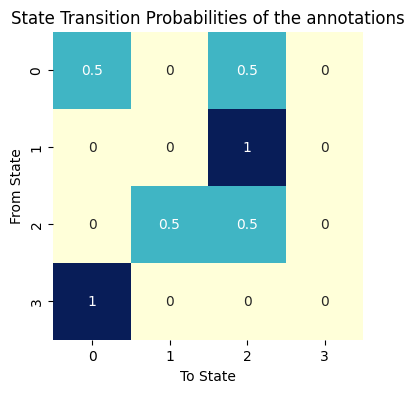

In [29]:
transition_matrix = best_model.transmat_
plt.figure(figsize=(4, 4))
sns.heatmap(transition_matrix, annot=True, cmap="YlGnBu", cbar=False)
plt.title('State Transition Probabilities of the annotations')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()

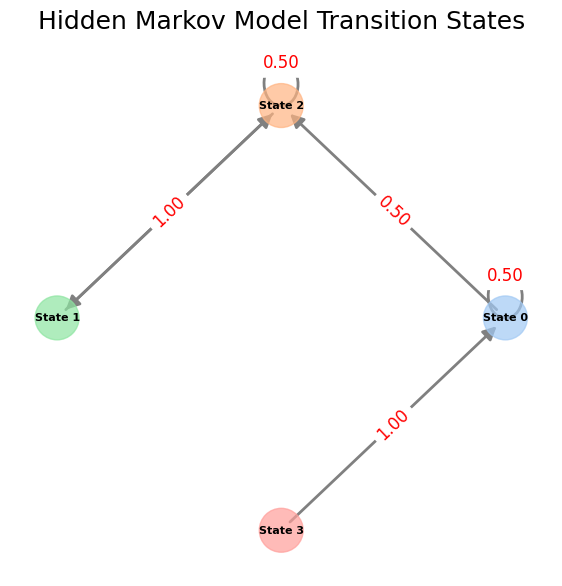

In [27]:
# Create a directed graph using NetworkX
G = nx.DiGraph()
num_states = transition_matrix.shape[0]
for i in range(num_states):
    for j in range(num_states):
        prob = transition_matrix[i, j]
        if prob > 0:  # Only add edges for non-zero probabilities
            G.add_edge(f'State {i}', f'State {j}', weight=prob)

# Use a color palette from seaborn for visual appeal
colors = sns.color_palette("pastel", num_states)

# Visualize the graph with enhanced aesthetics
pos = nx.circular_layout(G)
edge_labels = {(n1, n2): f"{d['weight']:.2f}" for n1, n2, d in G.edges(data=True)}

plt.figure(figsize=(7, 7))
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=colors, node_shape="o", alpha=0.7)
nx.draw_networkx_edges(G, pos, width=2, edge_color="gray", arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)

plt.title('Hidden Markov Model Transition States', fontsize=18)
plt.axis('off')
plt.show()